In [1]:
"""6주차: 로지스틱 회귀 전체 파이프라인 (유방암 진단 데이터 버전).

6주차 차시 1~3에서 다루는 로지스틱 회귀(Logistic Regression) 분류
실습 코드입니다.

데이터: sklearn.datasets.load_breast_cancer (유방암 진단 → 악성/양성 분류)

Contents:
    1. 라이브러리 임포트
    2. 데이터 로드 및 탐색 (차시 3)
    3. 피처(X)와 타겟(y) 분리 (차시 3)
    4. 훈련/테스트 분리 (차시 3)
    5. LogisticRegression 모델 생성, 학습, 예측 (차시 3)
    6. 훈련 정확도 vs 테스트 정확도 비교 (차시 3)
    7. predict_proba — 확률 출력 확인 (차시 1)
    8. 여러 임계값 실험 (차시 2)
    9. 임계값 체계적 실험 0.01~0.99 (차시 2)
    10. 그래프 시각화 및 패턴 분석 (차시 2)
    11. 최적 임계값 확인
"""

'6주차: 로지스틱 회귀 전체 파이프라인 (유방암 진단 데이터 버전).\n\n6주차 차시 1~3에서 다루는 로지스틱 회귀(Logistic Regression) 분류\n실습 코드입니다.\n\n데이터: sklearn.datasets.load_breast_cancer (유방암 진단 → 악성/양성 분류)\n\nContents:\n    1. 라이브러리 임포트\n    2. 데이터 로드 및 탐색 (차시 3)\n    3. 피처(X)와 타겟(y) 분리 (차시 3)\n    4. 훈련/테스트 분리 (차시 3)\n    5. LogisticRegression 모델 생성, 학습, 예측 (차시 3)\n    6. 훈련 정확도 vs 테스트 정확도 비교 (차시 3)\n    7. predict_proba — 확률 출력 확인 (차시 1)\n    8. 여러 임계값 실험 (차시 2)\n    9. 임계값 체계적 실험 0.01~0.99 (차시 2)\n    10. 그래프 시각화 및 패턴 분석 (차시 2)\n    11. 최적 임계값 확인\n'

# 6주차: 로지스틱 회귀 전체 파이프라인
### 🔬 데이터: 유방암 진단 수치 → 악성(0) / 양성(1) 이진 분류
---
## 차시 1 핵심 요약 (이론)
- 로지스틱 회귀 구조: **선형 결합 → 시그모이드 → 확률 출력**
- 시그모이드: 어떤 실수든 0~1 사이로 변환 (S자)
- predict: **레이블(0/1)** vs predict_proba: **확률(0.0~1.0)**
- C = **하이퍼파라미터** (= 1/alpha, k의 방향과 반대)
- C ↓(작음): 정규화 강, 단순, 과소적합 위험
- C ↑(큼): 정규화 약, 복잡, 과적합 위험

## 차시 2 핵심 요약 (이론)
- 의사결정경계: 로지스틱 회귀의 경계 = **직선** (선형 모델)
- 임계값(Threshold) = **하이퍼파라미터** (학습 후 사용자가 설정)
- 임계값 기본값: 0.5
- 임계값 ↓(낮춤): 재현율↑ 정밀도↓ → FN 최소화 전략
- 임계값 ↑(높임): 정밀도↑ 재현율↓ → FP 최소화 전략

---
## Step 1. 라이브러리 임포트

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# 그래프 한글깨짐 방지
# 1. 나눔 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 코드 상단에 폰트 설정 및 마이너스 부호 처리
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

---
## Step 2. 데이터 로드 및 탐색
- **데이터**: `sklearn.datasets.load_breast_cancer` (유방암 진단)
- **피처 (30개)**: 세포핵의 반지름, 텍스처, 둘레, 면적, 매끄러움 등 수치형
- **타겟**: `악성(0)` / `양성(1)` — 이진 분류
- **week2와의 차이**: 모든 피처가 이미 수치형 → LabelEncoder 불필요

In [3]:
data = load_breast_cancer()

# DataFrame으로 변환해서 탐색
df = pd.DataFrame(data.data, columns=data.feature_names)
df["악성여부"] = data.target

print(f"데이터 shape: {data.data.shape}")
print(f"피처 수: {len(data.feature_names)}")
print(f"타겟 클래스: {dict(enumerate(data.target_names))}")
print()
df.head()

데이터 shape: (569, 30)
피처 수: 30
타겟 클래스: {0: np.str_('malignant'), 1: np.str_('benign')}



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,악성여부
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# 타겟(악성여부) 분포 확인
print("=== 타겟 분포 ===")
print(df["악성여부"].value_counts().sort_index())
print()
print("  0: 악성 (Malignant)  |  1: 양성 (Benign)")

=== 타겟 분포 ===
악성여부
0    212
1    357
Name: count, dtype: int64

  0: 악성 (Malignant)  |  1: 양성 (Benign)


In [5]:
# 수치형 피처 기초 통계
print("=== 수치형 피처 기초 통계 ===")
df.drop("악성여부", axis=1).describe()

=== 수치형 피처 기초 통계 ===


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


---
## Step 3. 피처(X)와 타겟(y) 분리

breast_cancer 데이터는 **모든 피처가 수치형**이므로 인코딩 없이 바로 사용합니다.

> week2에서 `LabelEncoder`가 필요했던 이유: 범주형 텍스트를 숫자로 변환해야
> k-NN이 거리를 계산할 수 있었기 때문입니다.
> 로지스틱 회귀도 동일하게 숫자 입력이 필요하며, 이 데이터는 이미 준비된 상태입니다.

In [6]:
# 피처: 진단 수치 30개
X = data.data

# 타겟: 악성(0) / 양성(1)
y = data.target

print(f"피처 shape: {X.shape}")
print(f"타겟 shape: {y.shape}")
print(f"타겟 클래스: {dict(enumerate(data.target_names))}")

피처 shape: (569, 30)
타겟 shape: (569,)
타겟 클래스: {0: np.str_('malignant'), 1: np.str_('benign')}


---
## Step 4. 훈련/테스트 분리
- `test_size=0.3`: 전체의 30%를 테스트 세트로 분리
- `random_state=42`: 재현성(reproducibility)을 위한 랜덤 시드 고정

**왜 나누는가?** → 모델의 **일반화 성능**(새 데이터에서의 진짜 실력)을 측정하기 위해

⚠ **공정한 비교 원칙**: 이후 임계값 실험은 이 분리를 1회만 사용합니다.
임계값을 바꿀 때마다 새로 분리하면 어떤 분리가 좋아서 좋아졌는지 알 수 없습니다.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"훈련 세트: {X_train.shape[0]}개")
print(f"테스트 세트: {X_test.shape[0]}개")

훈련 세트: 398개
테스트 세트: 171개


---
## Step 5. LogisticRegression 모델 생성 · 학습 · 예측 (임계값 기본값 0.5)
- `C=1.0`: 하이퍼파라미터 C를 명시적으로 설정 (기본값)
- `max_iter=10000`: 수렴 보장을 위해 반복 횟수 상한을 넉넉하게 설정
- `fit()`: 훈련 데이터로 계수(w)와 절편(b)을 학습
- `predict()`: **임계값 0.5** 기준으로 클래스 레이블 출력

> k-NN에서 `n_neighbors=5`가 하이퍼파라미터였던 것처럼,
> 로지스틱 회귀에서는 `C`가 하이퍼파라미터입니다. (차시 1)

In [8]:
model = LogisticRegression(C=1.0, max_iter=10000, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"테스트 정확도 (임계값 0.5): {accuracy:.4f}")

테스트 정확도 (임계값 0.5): 0.9766


---
## Step 6. 훈련 정확도 vs 테스트 정확도 비교
- 훈련 정확도: 이미 본 데이터에 대한 성능 (가짜 실력일 수 있음)
- 테스트 정확도: 본 적 없는 데이터에 대한 성능 (진짜 실력)

| 패턴 | 훈련 | 테스트 | 진단 |
|------|------|--------|------|
| 양호 | 높음 | 높음 | ✓ |
| 과적합 | 높음 | 낮음 | ⚠ |
| 과소적합 | 낮음 | 낮음 | ✗ |

In [9]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"훈련 정확도 (임계값 0.5): {train_accuracy:.4f}")
print(f"테스트 정확도 (임계값 0.5): {accuracy:.4f}")
print(f"차이 (gap):                {train_accuracy - accuracy:.4f}")

훈련 정확도 (임계값 0.5): 0.9598
테스트 정확도 (임계값 0.5): 0.9766
차이 (gap):                -0.0168


---
## Step 7. predict_proba — 확률 출력 확인 (차시 1 핵심)
- `predict_proba`: 각 클래스에 속할 확률을 2열 배열로 출력
  - 1열: 악성(0)일 확률  |  2열: 양성(1)일 확률
  - 두 값의 합 = 항상 **1.0**
- `predict`는 내부적으로 `predict_proba`에서 확률이 더 높은 클래스를 선택한 것
- **임계값 0.5** = 양성 확률 ≥ 0.5 이면 양성(1)으로 분류

> k-NN은 "클래스 0 또는 1"만 알려줍니다.
> 로지스틱 회귀는 **"양성일 확률 89%"**까지 알려줍니다. (차시 1)

In [10]:
y_proba = model.predict_proba(X_test)

print(f"predict_proba 출력 형태: {y_proba.shape}")
print()
print("처음 10개 샘플의 확률:")
print(f"{'번호':>4} {'악성(0) 확률':>12} {'양성(1) 확률':>12} {'predict':>8} {'실제':>6}")
print("-" * 48)
for i in range(10):
    print(f"{i+1:>4} {y_proba[i, 0]:>12.4f} {y_proba[i, 1]:>12.4f} {predictions[i]:>8} {y_test[i]:>6}")
print()
print("★ 두 열의 합 = 항상 1.0")
print("★ predict = predict_proba에서 확률이 더 높은 클래스를 선택한 결과")

predict_proba 출력 형태: (171, 2)

처음 10개 샘플의 확률:
  번호     악성(0) 확률     양성(1) 확률  predict     실제
------------------------------------------------
   1       0.1391       0.8609        1      1
   2       1.0000       0.0000        0      0
   3       0.9982       0.0018        0      0
   4       0.0013       0.9987        1      1
   5       0.0002       0.9998        1      1
   6       1.0000       0.0000        0      0
   7       1.0000       0.0000        0      0
   8       0.9809       0.0191        0      0
   9       0.0202       0.9798        1      1
  10       0.0060       0.9940        1      1

★ 두 열의 합 = 항상 1.0
★ predict = predict_proba에서 확률이 더 높은 클래스를 선택한 결과


---
## Step 8. 여러 임계값 실험 (차시 2 — 3개 임계값)
- 동일한 훈련/테스트 분리에서 임계값만 변경 → **공정한 비교**
- `train_test_split`은 Step 4에서 1회만 실행
- 임계값을 바꾸는 것은 **모델 재학습이 아님** — 이미 출력된 확률을 "어디서 자르느냐"만 변경

> week2에서 `k_values = [1, 3, 5, 7, 9, 15]`로 선택적 실험을 했던 것과 같은 구조입니다.

In [11]:
threshold_values = [0.3, 0.5, 0.7]

# 양성(1) 확률만 추출 — 이후 실험 전체에서 재사용
proba_class1 = model.predict_proba(X_test)[:, 1]

print(f"{'임계값':>6} | {'양성 예측 수':>10} | {'정밀도':>8} | {'재현율':>8} | {'F1':>8}")
print("-" * 55)

for t in threshold_values:
    # 핵심: 임계값 변경 = 이 한 줄
    y_pred_t = (proba_class1 >= t).astype(int)

    prec = precision_score(y_test, y_pred_t, zero_division=0)
    rec = recall_score(y_test, y_pred_t, zero_division=0)
    f1 = f1_score(y_test, y_pred_t, zero_division=0)
    n_pos = int(np.sum(y_pred_t == 1))

    print(f"{t:>6.1f} | {n_pos:>10} | {prec:>8.4f} | {rec:>8.4f} | {f1:>8.4f}")

   임계값 |    양성 예측 수 |      정밀도 |      재현율 |       F1
-------------------------------------------------------
   0.3 |        110 |   0.9636 |   0.9815 |   0.9725
   0.5 |        108 |   0.9815 |   0.9815 |   0.9815
   0.7 |        105 |   0.9905 |   0.9630 |   0.9765


---
## Step 9. 임계값 체계적 실험 0.01~0.99 (차시 2)
- 넓은 범위의 임계값을 촘촘하게 실험
- 정밀도, 재현율, F1을 리스트에 저장

> week2에서 `k_range = range(1, 51)`로 k를 촘촘하게 실험했던 것과 같은 구조입니다.

In [12]:
threshold_range = np.arange(0.01, 1.0, 0.01)
precisions = []
recalls = []
f1_scores = []

for t in threshold_range:
    y_pred_t = (proba_class1 >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_t, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_t, zero_division=0))

---
## Step 10. 그래프 시각화 — 임계값 ↔ 정밀도/재현율 변화
- x축: 임계값 (Threshold)
- y축: 점수 (정밀도 / 재현율 / F1)
- 파란 선: 정밀도 / 초록 선: 재현율 / 주황 선: F1

### 그래프 해석 3구간
| 구간 | 임계값 범위 | 특징 | 진단 |
|------|------------|------|------|
| A | 임계값 낮음 | 재현율↑ 정밀도↓ | FN 최소화 |
| B | 임계값 적절 | F1 최대 | 균형 (sweet spot) |
| C | 임계값 높음 | 정밀도↑ 재현율↓ | FP 최소화 |

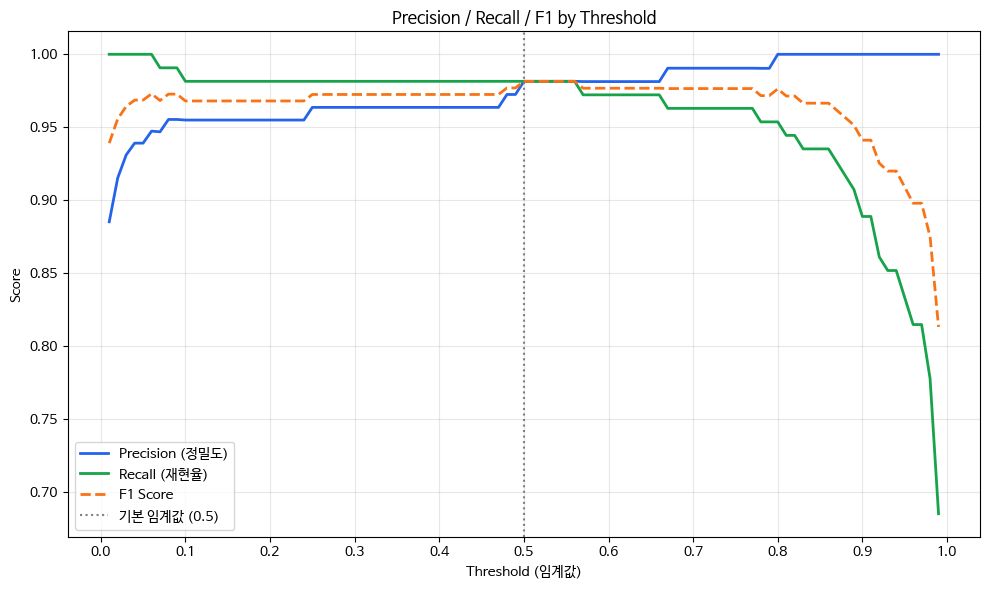

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(
    list(threshold_range),
    precisions,
    label="Precision (정밀도)",
    color="#2563eb",
    linewidth=2,
)
plt.plot(
    list(threshold_range),
    recalls,
    label="Recall (재현율)",
    color="#16a34a",
    linewidth=2,
)
plt.plot(
    list(threshold_range),
    f1_scores,
    label="F1 Score",
    color="#f97316",
    linewidth=2,
    linestyle="--",
)
plt.axvline(x=0.5, color="gray", linestyle=":", linewidth=1.5, label="기본 임계값 (0.5)")
plt.xlabel("Threshold (임계값)")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 by Threshold")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()

---
## Step 11. 최적 임계값 확인

In [14]:
best_idx = f1_scores.index(max(f1_scores))
best_threshold = float(threshold_range[best_idx])
best_f1 = f1_scores[best_idx]
best_prec = precisions[best_idx]
best_rec = recalls[best_idx]

print(f"F1 점수가 가장 높은 임계값: {best_threshold:.2f}")
print(f"해당 정밀도: {best_prec:.4f}")
print(f"해당 재현율: {best_rec:.4f}")
print(f"해당 F1:     {best_f1:.4f}")
print()
print("⚠ 주의: 이 결과는 random_state=42에서의 단일 분할 결과입니다.")
print("  random_state를 바꾸면 최적 임계값도 달라질 수 있습니다.")
print("  더 안정적인 평가 → 4주차 교차검증(Cross-Validation)")
print()
print("★ 다음 실험: C 파라미터를 바꿔가며 임계값 0.5 고정 후 성능 비교")
print("  C = [0.01, 0.1, 1.0, 10, 100] → 차시 1에서 배운 정규화 강도 실험")

F1 점수가 가장 높은 임계값: 0.50
해당 정밀도: 0.9815
해당 재현율: 0.9815
해당 F1:     0.9815

⚠ 주의: 이 결과는 random_state=42에서의 단일 분할 결과입니다.
  random_state를 바꾸면 최적 임계값도 달라질 수 있습니다.
  더 안정적인 평가 → 4주차 교차검증(Cross-Validation)

★ 다음 실험: C 파라미터를 바꿔가며 임계값 0.5 고정 후 성능 비교
  C = [0.01, 0.1, 1.0, 10, 100] → 차시 1에서 배운 정규화 강도 실험
